In [41]:
import shap
import numpy as np
import pandas as pd
from imblearn.over_sampling import KMeansSMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [24]:
def clean_dataframe(df):

    df.drop(columns=['name', 'followers', 'commit_count_a', 'churn_a', 'source', 'job', 'name_without_spaces',
                     'project','index'], inplace=True)

    df['days_in_project'] = df['days_in_project'].round()
    df['days_in_project'].replace(0, 1, inplace=True)

Log columns in the dataset to reduce the skewness in data.

In [25]:
def log_dataframe(df):

    columns_4_log = ['total_add_delete', 'days_in_project', 'commit_count', 'total_files_add_delete',
                     'total_add_delete_a', 'total_add_delete_structural', 'add', 'delete', 'add_a', 'delete_a',
                     'add_structural','delete_structural']

    for column in columns_4_log:
        df[column] = np.log(df[column] + 1)

Returns labels (y)

In [26]:
def get_labels(df):
    df.loc[df['job'] == "SA", 'job'] = "SSE"
    df.loc[df['job'] != "SSE", 'job'] = "NSSE"

    return df["job"]

In [31]:
shap.initjs()

In [6]:
ACTIVATION = "relu"  # Default "relu"
SOLVER = "adam"  # Default "ADAM"
ALPHA = 0.0001  # Default 0.0001
BATCH_SIZE = "auto"  # Default "AUTO"
LEARNING_RATE = "constant"  # Default "CONSTANT"
LEARNING_RATE_INIT = 0.001  # Default 0.001
POWER_T = 0.5  # Default 0.5
MAX_ITER = 1500  # Default 200
SHUFFLE = True  # Default True
RANDOM_STATE = 42  # Default None
TOL = 1e-4  # Default 1e-4
VERBOSE = False  # Default False
WARM_START = False  # Default False
MOMENTUM = 0.9  # Default 0.9
NESTEROVS_MOMENTUM = True  # Default True
EARLY_STOPPING = False  # Default False
VALIDATION_FRACTION = 0.1  # Default 0.1
BETA_1 = 0.9  # Default 0.9
BETA_2 = 0.999  # Default 0.999
EPSILON = 1e-08  # Default 1e-08
N_ITER_NO_CHANGE = 10  # Default 10


scaler = MinMaxScaler(feature_range=(-1,1))
smote = KMeansSMOTE(sampling_strategy='minority', random_state=9090)
classifier = MLPClassifier(hidden_layer_sizes=(75, 204, 203), activation=ACTIVATION,
                                solver=SOLVER, alpha=ALPHA, batch_size=BATCH_SIZE,
                                learning_rate=LEARNING_RATE,
                                learning_rate_init=LEARNING_RATE_INIT,
                                power_t=POWER_T, max_iter=MAX_ITER, shuffle=SHUFFLE,
                                random_state=RANDOM_STATE, tol=TOL, verbose=VERBOSE,
                                warm_start=WARM_START, momentum=MOMENTUM,
                                nesterovs_momentum=NESTEROVS_MOMENTUM,
                                early_stopping=EARLY_STOPPING,
                                validation_fraction=VALIDATION_FRACTION, beta_1=BETA_1,
                                beta_2=BETA_2, epsilon=EPSILON,
                                n_iter_no_change=N_ITER_NO_CHANGE)

#(130,)
# (75, 204, 203)
# (213, 118)
#(166, 275, 147, 64, 78)

In [7]:
df = pd.read_csv("merged_2_annotated.csv")
y = get_labels(df)

clean_dataframe(df)
log_dataframe(df)

X = df
X_scaled = scaler.fit_transform(X)

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
#                                                   test_size = .25,
#                                                   random_state=12,
#                                                  stratify=y)
# 
# X_train_synthetic, y_train_synthetic = smote.fit_resample(X_train, y_train)
# classifier.fit(X_train_synthetic,y_train_synthetic)


MLPClassifier(hidden_layer_sizes=(75, 204, 203), max_iter=1500, random_state=42)

In [ ]:
# X_train_summary = shap.kmeans(X_train_synthetic, 6)
# explainer = shap.KernelExplainer(classifier.predict_proba, X_train_summary)
# shap_values = explainer.shap_values(X_test)
# #print(shap_values)
# #print(classifier.predict_proba(X_test))
# #shap.force_plot(explainer.expected_value[0], shap_values[0], X[:3])
# 
# #shap.plots.heatmap(shap_values)
# #shap.plots.beeswarm(shap_values)
# shap.summary_plot(shap_values[0], X_test,feature_names=X.columns.to_list(), plot_type='dot')
# #shap.force_plot(shap_values, X_test,feature_names=X.columns.to_list())

  0%|          | 0/176 [00:00<?, ?it/s]

===> Start kfold <===
=> Fold :  1


  0%|          | 0/176 [00:00<?, ?it/s]

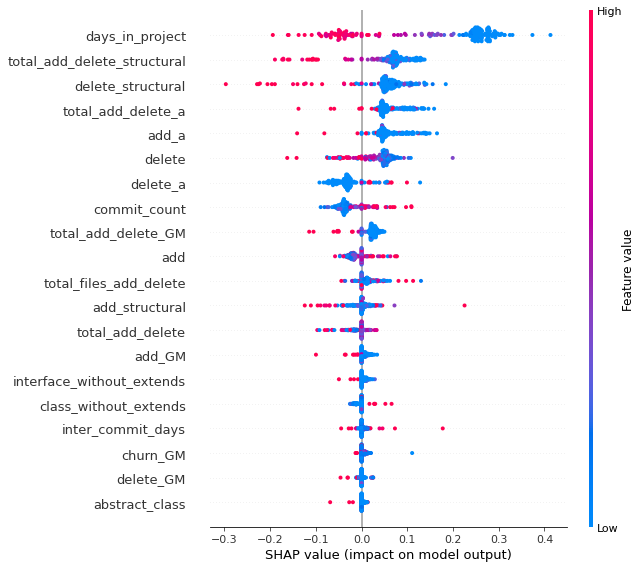

=> Fold :  2


  0%|          | 0/176 [00:00<?, ?it/s]

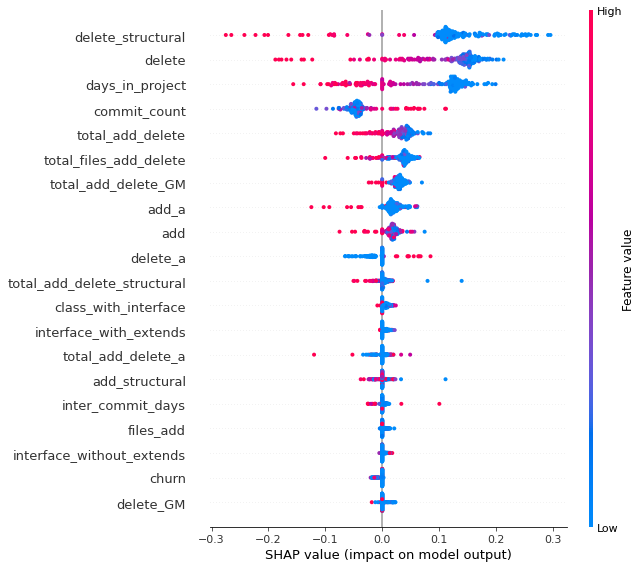

=> Fold :  3


  0%|          | 0/176 [00:00<?, ?it/s]

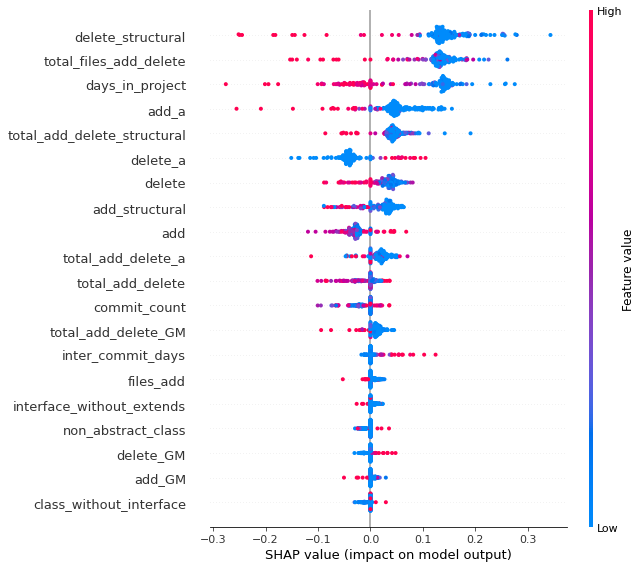

=> Fold :  4


  0%|          | 0/175 [00:00<?, ?it/s]

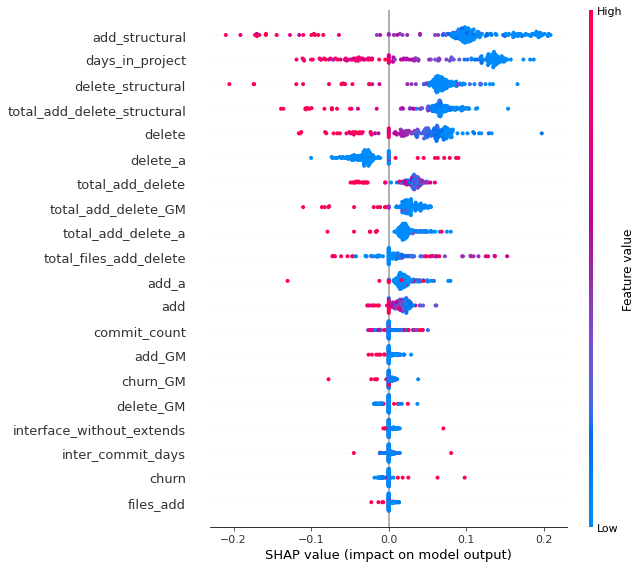

In [42]:
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
print("===> Start kfold <===")

for fold, (train_index, test_index) in enumerate(kf.split(X_scaled, y), 1):
    print("=> Fold : ",fold)
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X_scaled[train_index]
    y_train = y[train_index]
    X_test = X_scaled[test_index]
    y_test = y[test_index]

    X_train_synthetic, y_train_synthetic = smote.fit_resample(X_train, y_train)
    classifier.fit(X_train_synthetic, y_train_synthetic)
    
    X_train_summary = shap.kmeans(X_train_synthetic, 6)
    explainer = shap.KernelExplainer(classifier.predict_proba, X_train_summary)
    shap_values = explainer.shap_values(X_test)
    # #print(shap_values)
    # #print(classifier.predict_proba(X_test))
    # #shap.force_plot(explainer.expected_value[0], shap_values[0], X[:3])
    # 
    # #shap.plots.heatmap(shap_values)
    # #shap.plots.beeswarm(shap_values)
    shap.summary_plot(shap_values[0], X_test,feature_names=X.columns.to_list(), plot_type='dot')
